# Second OpenSeesPy Script: Nonlinear Model of a Frame
#### Autor: Orlando Arroyo
#### email: odarroyo@uc.cl
#### based on the example available at: https://opensees.berkeley.edu/wiki/index.php?title=OpenSees_Example_5._2D_Frame,_3-story_3-bay,_Reinforced-Concrete_Section_%26_Steel_W-Section

## Loading necessary libraries

In [1]:
from openseespy.opensees import *
import opsvis as opsv # You need to call opsvis to plot the model being generated.
import matplotlib.pyplot as plt # This is a standard library for plotting various elements and creating figures.
import opseestools.analisis as an # Analysis library with various options
import numpy as np # Numpy library for mathematical operationss

## Model creation

In [2]:
wipe() # It is good practice to start with a wipe 
model('basic','-ndm',2,'-ndf',3) # Creation of a two-dimensional model with three degrees of freedom per node

## Definition of nodes and supports

<AxesSubplot:>

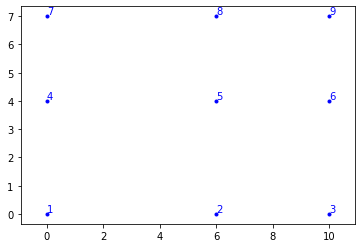

In [3]:
x1 = 6.0
x2 = 10.0
y1 = 4.0
y2 = 7.0

node(1,0.0,0.0) # Definition of node 1 with X and Y coordinates of 0.0 and 0.0
node(2,x1,0.0)
node(3,x2,0.0)
node(4,0.0,y1)
node(5,x1,y1)
node(6,x2,y1)
node(7,0.0,y2)
node(8,x1,y2)
node(9,x2,y2)

# Construction supports
empotrado = [1,1,1] # Restrict degrees of freedom X, Y, and Z
grado2 = [1,1,0] # Restrict degrees of freedom X and Y, leaving Z free

fix(1,*empotrado)
fix(2,*empotrado)
fix(3,*grado2)

# Visualization of the nodes
opsv.plot_model()

## Definition of diaphragms and masses

In [4]:
# Diaphragms
equalDOF(4,5,1) # Make the displacement of node 5 in X equal to that of node 4
equalDOF(4,6,1)
equalDOF(7,8,1) 
equalDOF(7,9,1)

# Masses
mass(4,1,1,0) # Assignment of masses in X and Y to node 4
mass(5,1,1,0)
mass(6,1,1,0)
mass(7,1,1,0)
mass(8,1,1,0)
mass(9,1,1,0)

## Definition of materials

In [5]:
# Unconfined concrete
E = 24000000.0 # 24 GPa converted to kPa to make it consistent
fc = 28000.0
ec = 2*fc/E
fcu = 0.2*fc
ecu = 0.006

# Confined concrete
k=1.3
fcc=28000.0*k
ecc= 2*fcc/E
fucc=0.2*fcc
eucc=0.02

# Steel
Fy=420000.0
Es=210000000.0

uniaxialMaterial('Concrete01', 2, fc, ec, fcu, ecu)
uniaxialMaterial('Concrete01', 1, fcc, ecc, fucc, eucc)
uniaxialMaterial('Steel01', 3, Fy, Es, 0.01)

## Fiber section creation


<Figure size 432x288 with 0 Axes>

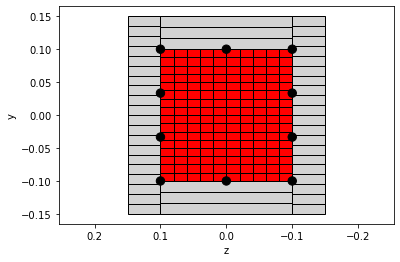

In [6]:
# An example of fiber section creation
# Section of 30 x 30 cm with 8 # 4

Bcol = 0.3
Hcol = 0.3
c = 0.05  # Covering 

# Fiber section creation
y1col = Hcol/2.0
z1col = Bcol/2.0

y2col = 0.5*(Hcol-2*c)/3.0

nFibZ = 1
nFibZcore= 10
nFib = 20
nFibCover, nFibCore = 3, 16
As4 = 0.000127
As5 = 0.0002
As7 = 0.000387

sec30x30 = 1 # Tag section

# The opsvis library will be used to visualize the section
s30x30 = [['section', 'Fiber', sec30x30, '-GJ', 1.0e6],
             ['patch', 'rect', 1, nFibCore, nFibZcore, c-y1col, c-z1col, y1col-c, z1col-c],
             ['patch', 'rect', 2, nFib, nFibZ, -y1col, -z1col, y1col, c-z1col],
             ['patch', 'rect', 2, nFib, nFibZ, -y1col, z1col-c, y1col, z1col],
             ['patch', 'rect', 2, nFibCover, nFibZ, -y1col, c-z1col, c-y1col, z1col-c],
             ['patch', 'rect', 2, nFibCover, nFibZ, y1col-c, c-z1col, y1col, z1col-c],
             ['layer', 'straight', 3, 3, As4, y1col-c, z1col-c, y1col-c, c-z1col],
             ['layer', 'straight', 3, 2, As4, y2col, z1col-c, y2col, c-z1col],
             ['layer', 'straight', 3, 2, As4, -y2col, z1col-c, -y2col, c-z1col],
             ['layer', 'straight', 3, 3, As4, c-y1col, z1col-c, c-y1col, c-z1col]]

# The following commands draw the section to verify that everything is correct
matcolor = ['r', 'lightgrey', 'gold', 'w', 'w', 'w']
plt.figure()
opsv.plot_fiber_section(s30x30, matcolor=matcolor)
plt.axis('equal')

# The following command properly creates the section by executing the code defined in the list
opsv.fib_sec_list_to_cmds(s30x30)

# To generate the fiber elements, you need to specify the integration points and the integration scheme.
pint = 5 # Integration points
beamIntegration('Lobatto', sec30x30, sec30x30,pint) # Integration scheme

## Definition of elements

<AxesSubplot:>

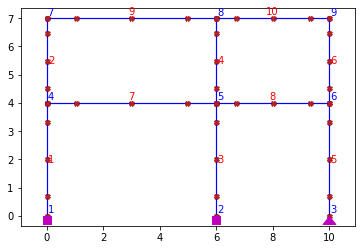

In [7]:
# Element transformations
lineal = 1
geomTransf('Linear',lineal) # Linear transformation

pdelta = 2
geomTransf('PDelta',pdelta) # PDelta transformation

# Columns
element('forceBeamColumn',1, 1,4 ,pdelta,sec30x30)
element('forceBeamColumn',2, 4,7 ,pdelta,sec30x30)
element('forceBeamColumn',3, 2,5 ,pdelta,sec30x30)
element('forceBeamColumn',4, 5,8 ,pdelta,sec30x30)
element('forceBeamColumn',5, 3,6 ,pdelta,sec30x30) 
element('forceBeamColumn',6, 6,9 ,pdelta,sec30x30) 

# Beams
element('forceBeamColumn',7, 4,5 ,lineal,sec30x30)
element('forceBeamColumn',8, 5,6 ,lineal,sec30x30)
element('forceBeamColumn',9, 7,8 ,lineal,sec30x30) 
element('forceBeamColumn',10, 8,9 ,lineal,sec30x30) 

# Visualize the model
opsv.plot_model()

#### The red points correspond to the locations of the integration points.

## Model loads

In [8]:
timeSeries('Linear', 1)
pattern('Plain',1,1)

# The `load` command assigns a point load to a node in the degrees of freedom X, Y, and Z.
# There are two ways to assign them.

# Method 1:
load(4,5.0,0.0,0.0)

# Method 2:
carga7 = [10.0, 0.0, 0.0]
load(7,*carga7)

# The `eleload` command assigns a load to the element.:
vigas = [7,8,9,10] # Element tags beams
wviga = 20 # Distributed load on the beam
eleLoad('-ele',*vigas,'-type','beamUniform',-wviga) # Application of the load on the beam

## Calculation of eigenvalues and modal shapes

The fundamental period is:  0.241677010681145


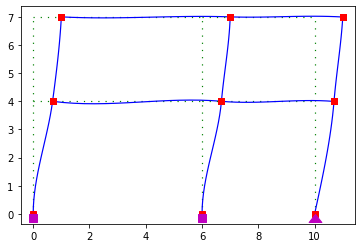

In [9]:
eig= eigen(1) # The `eigen` command calculates the frequencies for the specified number of modes. In this case, 1 mode is specified.
T1 = 2*3.1416/np.sqrt(eig[0]) # The corresponding period is obtained.
print('The fundamental period is: ',T1) # Se imprime el resultado

# Visualization of the first modal shape
opsv.plot_mode_shape(1)

## Analysis of the model and representation of the deformation

Gravity analysis completed


86.70178972814458

<Figure size 432x288 with 0 Axes>

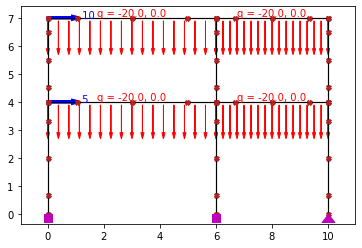

<Figure size 432x288 with 0 Axes>

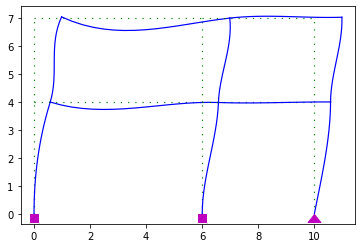

In [10]:
# The analysis library that was called is used.

an.gravedad()

# Representation of the model with loads
plt.figure()
opsv.plot_loads_2d()

# Representation of the deformation
plt.figure()
opsv.plot_defo()

## Obtaining node and element responses

##### Node responses

In [11]:
# displacement of node 9 in the X direction:
ux9 = nodeDisp(9,1)
print('The displacement of node 9 in the X direction ', ux9)

The displacement of node 9 in the X direction  0.011340880016288359


##### Elements reponse

In [12]:
# Forces in column 1
fcol1 = eleResponse(9,'globalForce')
print('The forces in column 1 are ', fcol1)

# The forces always correspond to the degrees of freedom. In this case, they are the three degrees of freedom for the initial node and the three for the final node

The forces in column 1 are [268.58259015769335, 54.3928904026054, 33.217005198372014, -268.58259015769335, 65.60710959739457, -66.85966278273949]
